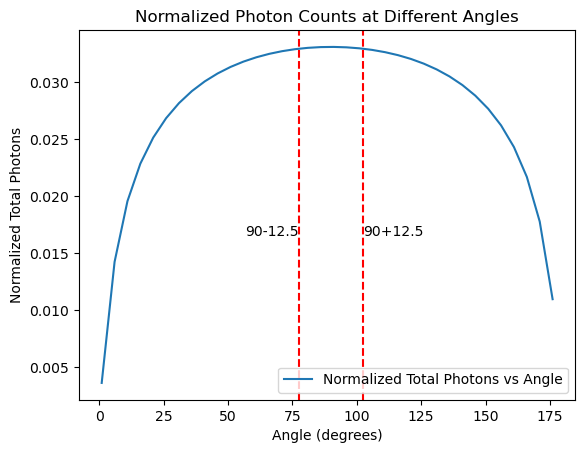

In [37]:
import spekpy as sp # X-Ray tube simulation package
import numpy as np
import matplotlib.pyplot as plt

# 初始化参数
tube_voltage = 40   # X射线管电压，单位为千伏特 (kV)
tube_current = 0.05 # X射线管电流，单位为微安秒 (uAs)

angles = np.arange(1, 181, 5)  # 从1度到180度，每5度一个角度

# 存储每个角度的光子总数
photon_counts = []

# 循环不同角度
for angle in angles:
    s = sp.Spek(kvp=tube_voltage, mas = tube_current, targ='W', th=angle)
    spectrum = s.get_spectrum()
    eng, nums = spectrum
    total_photons = sum(nums)
    photon_counts.append(total_photons)

# 归一化光子计数，使得总面积等于1
photon_counts_pdf = [count / sum(photon_counts) for count in photon_counts]

# 绘制不同角度下的归一化光子总数
plt.plot(angles, photon_counts_pdf, label='Normalized Total Photons vs Angle')

# 在90+-12.5的地方画两根竖线
plt.axvline(x=90-12.5, color='r', linestyle='--')
plt.axvline(x=90+12.5, color='r', linestyle='--')

# 在图上标明90+-12.5
plt.text(90-12.5, max(photon_counts_pdf)/2, '90-12.5', ha='right')
plt.text(90+12.5, max(photon_counts_pdf)/2, '90+12.5', ha='left')

plt.xlabel('Angle (degrees)')
plt.ylabel('Normalized Total Photons')
plt.title('Normalized Photon Counts at Different Angles')
plt.legend()  # Add this line
plt.show()